# **Latar Belakang**

Sebuah perusahaan hendak melakukan survey untuk mengetahui pangsa pasar di suatu negara, wilayah, dan sub wilayah, maka untuk menyelesaikan permasalahan ini, direkrut *data analyst* untuk mengetahui dan melakukan visualisasi pangsa pasar yang nantinya akan membantu perusahaan tersebut memutuskan kebijakan yang akan diambil nantinya.

# **Pernyataan Masalah**

Perusahaan hendak melakukan analisis data dan ini membantu perusahaan karena perusahaan tidak perlu mengeluarkan biaya yang besar dalam mengetahui pangsa pasar yang ada. Sebagai *data analyst*, kita akan mecoba menjawab pertanyaan ini:

Bagaimana segmen pasar yang bagus untuk setiap negara, wilayah, dan sub-wilayah?

Produk apa yang paling laris untuk setiap negara, wilayah, dan sub wilayah?

Produk apa yang memiliki tingkat penjualan terbesar untuk setiap negara, wilayah, dan sub wilayah?

Produk apa yang menghasilkan profit tertinggi untuk setiap negara, wilayah, dan sub wilayah?

# **Import Library**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# **Baca Data**

In [4]:
df=pd.read_csv('SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


# **Eksplorasi Data**

**Tampilkan info seluruh data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

**Deskripsi data**

In [6]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


**Tampilkan seluruh nama kolom**

In [7]:
column_names = df.columns

# Tampilkan nama kolom
for column in column_names:
    print(column)

Row ID
Order ID
Order Date
Date Key
Contact Name
Country
City
Region
Subregion
Customer
Customer ID
Industry
Segment
Product
License
Sales
Quantity
Discount
Profit


**Tampilkan value dari kolom Customer ID**

In [8]:
customer= df['Customer'].unique()
customer

array(['Chevron', 'Phillips 66', 'Royal Dutch Shell', 'BNP Paribas',
       'Engie', 'Microsoft', 'Pfizer', 'Toyota Motor', 'Home Depot',
       'Wells Fargo', 'Carrefour', 'Costco Wholesale', 'McKesson',
       'Siemens', 'Intel', 'Glencore', 'Procter & Gamble',
       'Banco Santander', 'Pemex', 'Samsung Electronics', 'Sony',
       'Morgan Stanley', 'Bank of America Corp.', 'Tesco', 'Aviva',
       'Mondelez International', 'Abbott Laboratories', 'Fannie Mae',
       'Aetna', 'Oracle', 'Nissan Motor', 'Tyson Foods',
       'Verizon Communications', 'Itochu', 'Daimler', 'Walgreens',
       'Boeing', 'Valero Energy', 'Nestle', 'Philip Morris International',
       'Trafigura Group', 'Walmart', 'Cisco Systems',
       'Prudential Financial', 'Amazon', 'Gazprom', 'FedEx',
       'Honda Motor', 'CVS Health', 'General Motors',
       'State Farm Insurance Cos.', 'Comcast', 'AmerisourceBergen',
       'Johnson & Johnson', 'HonHai Precision Industry',
       'American Express', 'J.P. Morgan

**Tampilkan nilai unik dalam setiap kolom**

In [9]:
kolom = ['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity', 'Discount', 'Profit']

# Cek nilai unik
for column in kolom:
    unique_values = df[column].unique()
    print(f'Kolom: {column}')
    print(unique_values)
    print('\n')

Kolom: Row ID
[   1    2    3 ... 9992 9993 9994]


Kolom: Order ID
['EMEA-2022-152156' 'AMER-2022-138688' 'EMEA-2021-108966' ...
 'EMEA-2020-110422' 'AMER-2023-121258' 'AMER-2023-119914']


Kolom: Order Date
['11/9/2022' '6/13/2022' '10/11/2021' ... '6/4/2022' '4/12/2021'
 '1/22/2020']


Kolom: Date Key
[20221109 20220613 20211011 ... 20220604 20210412 20200122]


Kolom: Contact Name
['Nathan Bell' 'Deirdre Bailey' 'Zoe Hodges' 'Thomas Hodges'
 'Adrian Hunter' 'Adrian Abraham' 'Emily Morrison' 'Claire Welch'
 'Carol Campbell' 'Blake Hughes' 'Melanie Sharp' 'Luke Bower'
 'Jonathan Ferguson' 'Sam Parsons' 'Neil Gill' 'Amelia Campbell'
 'Chloe Short' 'Jasmine Metcalfe' 'Karen Mathis' 'Dylan Dickens'
 'Sophie Lewis' 'Gavin Mitchell' 'Katherine Dowd' 'Harry Brown'
 'Brian Dickens' 'Joseph Newman' 'Nicola Howard' 'Stewart Wilson'
 'Eric McLean' 'Leah Clarkson' 'Alison Davidson' 'Sophie Vance' 'Anne Lee'
 'Maria Dyer' 'Julia Ellison' 'Gordon McLean' 'Jessica Buckland'
 'Bernadette Nolan' 'So

**Cek missing value**

In [10]:
missing_values = df.isna().sum()
print(missing_values)

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


**Cek nilai NaN**

In [11]:
nan = df.isna().sum()

print("Jumlah Nilai NaN:")
print(nan)

Jumlah Nilai NaN:
Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


**Cek data duplikat**

In [12]:
duplikat = df[df.duplicated()]

if not duplikat.empty:
    print("Data duplikat yang ditemukan:")
    print(duplikat)
else:
    print("Tidak ada data duplikat.")

Tidak ada data duplikat.


**Cek kolom dengan outlier**

In [13]:
# Menentukan batas bawah dan batas atas untuk deteksi outlier menggunakan IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outlier untuk setiap kolom numerik
outliers = ((df < lower_bound) | (df > upper_bound)).any()

# Menampilkan hasil deteksi outlier
print("Kolom dengan Outlier:")
print(outliers[outliers == True])

Kolom dengan Outlier:
Discount    True
Profit      True
Quantity    True
Sales       True
dtype: bool


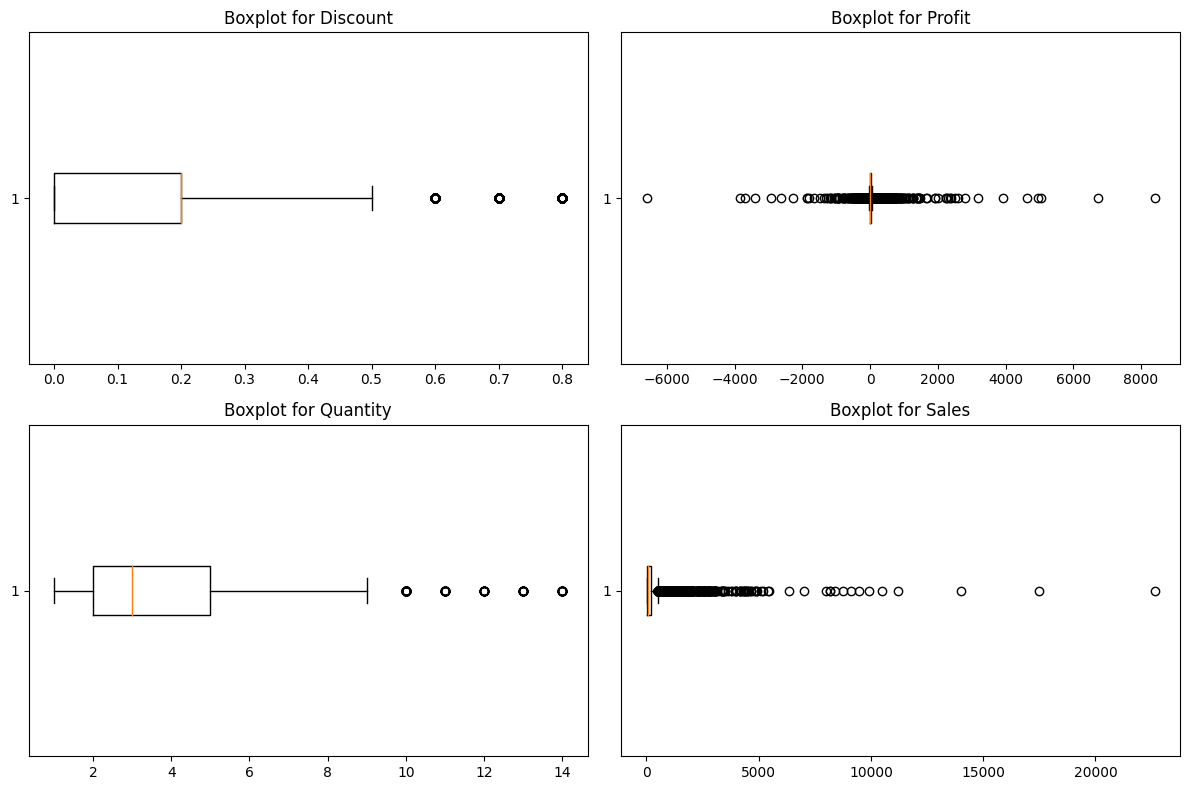

In [14]:
# Kolom-kolom dengan outlier
kolom_outlier = ['Discount', 'Profit', 'Quantity', 'Sales']

# Menampilkan boxplot untuk setiap kolom yang memiliki outlier
plt.figure(figsize=(12, 8))

for i, kolom in enumerate(kolom_outlier):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(df[kolom], vert=False)
    plt.title(f'Boxplot for {kolom}')

plt.tight_layout()
plt.show()

Outlier tidak terlalu signifikan

**Proporsi Industri berdasarkan 'Industry' dan 'City'**

In [15]:
pd.crosstab(df['City'],df['Industry'],normalize='index')

Industry,Communications,Consumer Products,Energy,Finance,Healthcare,Manufacturing,Misc,Retail,Tech,Transportation
City,,,,,,,,,,
Abu Dhabi,0.078947,0.026316,0.078947,0.210526,0.052632,0.368421,0.0,0.026316,0.131579,0.026316
Adelaide,0.000000,0.071429,0.000000,0.357143,0.000000,0.071429,0.0,0.357143,0.142857,0.000000
Aichi,0.092593,0.061728,0.197531,0.228395,0.092593,0.111111,0.0,0.061728,0.086420,0.067901
Alexandria,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Alicante,0.000000,0.000000,0.062500,0.000000,0.125000,0.437500,0.0,0.062500,0.312500,0.000000
...,...,...,...,...,...,...,...,...,...,...
Wollongong,0.000000,0.166667,0.111111,0.055556,0.111111,0.222222,0.0,0.277778,0.055556,0.000000
Yekaterinburg,0.000000,0.000000,0.625000,0.000000,0.375000,0.000000,0.0,0.000000,0.000000,0.000000
Yonkers,0.000000,0.000000,0.200000,0.400000,0.400000,0.000000,0.0,0.000000,0.000000,0.000000


**Proporsi Industri berdasarkan 'Industry' dan 'Segment'**

In [16]:
 pd.crosstab(df['Industry'],df['Segment'],normalize='index')

Segment,Enterprise,SMB,Strategic
Industry,,,
Communications,0.151771,0.468803,0.379427
Consumer Products,0.093046,0.611166,0.295788
Energy,0.175532,0.444529,0.379939
Finance,0.132111,0.550541,0.317348
Healthcare,0.130601,0.647283,0.222116
Manufacturing,0.262684,0.471358,0.265957
Misc,0.635514,0.299065,0.065421
Retail,0.220165,0.504115,0.275720
Tech,0.207120,0.452265,0.340615


**Modus 'Industry' berdasarkan 'Segment'**

In [17]:
df.groupby(['Industry']).describe(include='object')['Segment']['top']

Industry
Communications              SMB
Consumer Products           SMB
Energy                      SMB
Finance                     SMB
Healthcare                  SMB
Manufacturing               SMB
Misc                 Enterprise
Retail                      SMB
Tech                        SMB
Transportation              SMB
Name: top, dtype: object

**Proporsi data di kolom 'Industry' dan 'Segment'**

In [18]:
display(df['Segment'].value_counts()/df['Segment'].dropna().shape[0],
df['Industry'].value_counts()/df['Industry'].dropna().shape[0])

SMB           0.519412
Strategic     0.302181
Enterprise    0.178407
Name: Segment, dtype: float64

Finance              0.212828
Energy               0.131679
Tech                 0.123674
Manufacturing        0.122273
Healthcare           0.104963
Consumer Products    0.102161
Retail               0.097258
Communications       0.059336
Transportation       0.035121
Misc                 0.010706
Name: Industry, dtype: float64

# **Analisis Data**

**10 Kota mana yang memiliki profit terbanyak**

In [19]:
df['Profit'].value_counts()

0.0000     65
6.2208     43
9.3312     38
5.4432     32
3.6288     32
           ..
83.2508     1
16.1096     1
7.1988      1
1.6510      1
72.9480     1
Name: Profit, Length: 7287, dtype: int64

In [20]:
profit = df.groupby('City')['Profit'].sum().reset_index()
top10 = profit.sort_values(by='Profit', ascending=False).head(10)
top10

,City,Profit
135,London,62218.6138
166,New York City,30308.4886
240,Toronto,29176.8289
137,Los Angeles,17507.3854
228,São Paulo,13939.3011
96,Helsinki,11970.4817
139,Luxembourg,10823.1874
160,Mumbai,10375.9144
145,Manila,8194.0833
73,Dublin,7522.2916


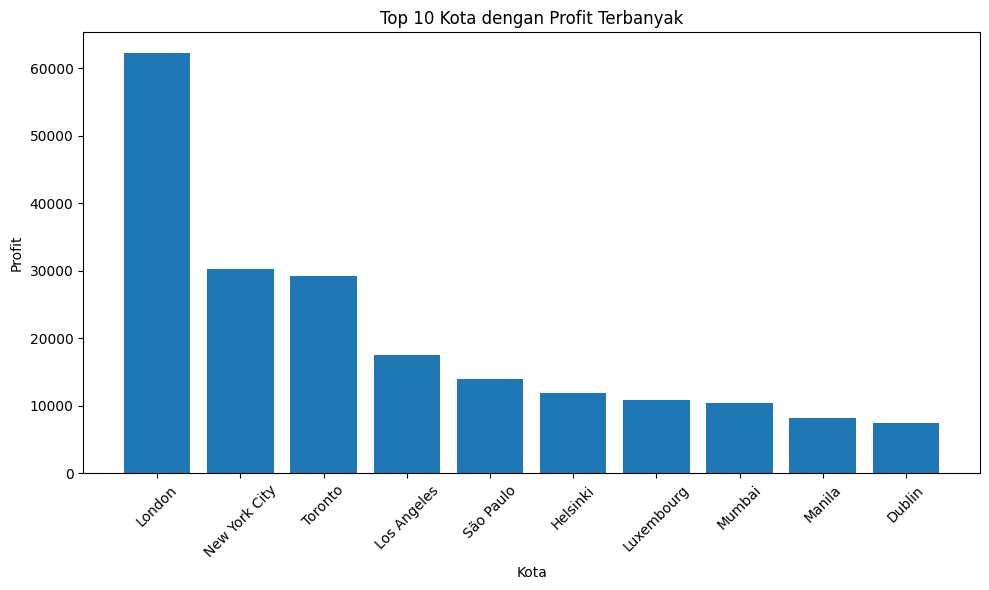

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(top10['City'], top10['Profit'])
plt.xlabel('Kota')
plt.ylabel('Profit')
plt.title('Top 10 Kota dengan Profit Terbanyak')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Profit berdasarkan segmen pelanggan**

In [22]:
# Hitung rata-rata profit per segmen pelanggan
segment_profit = df.groupby('Segment')['Profit'].mean().reset_index()
segment_profit = segment_profit.sort_values(by='Profit', ascending=False)
segment_profit

,Segment,Profit
0,Enterprise,33.818664
2,Strategic,30.456667
1,SMB,25.836873


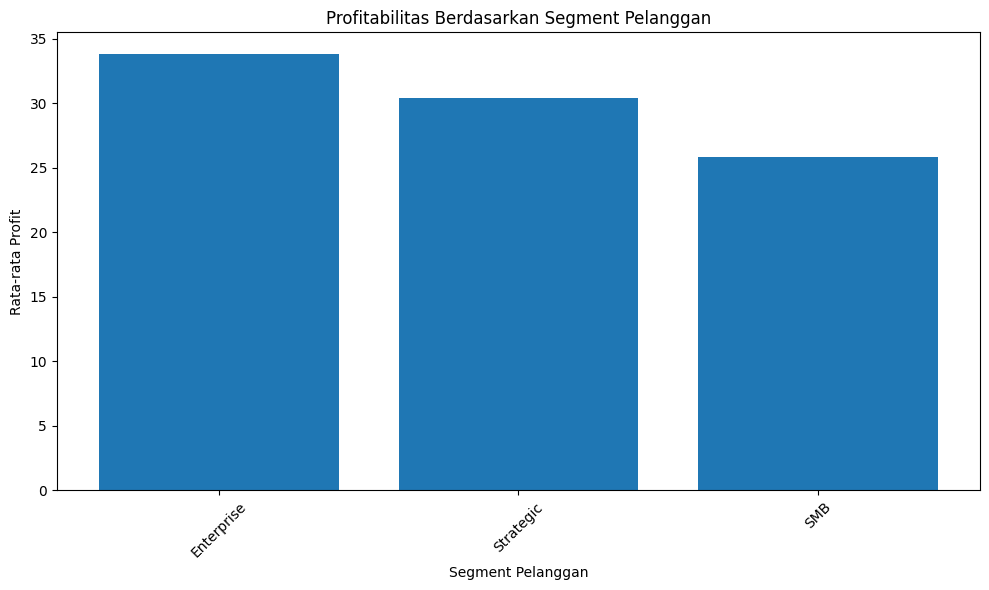

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(segment_profit['Segment'], segment_profit['Profit'])
plt.xlabel('Segment Pelanggan')
plt.ylabel('Rata-rata Profit')
plt.title('Profitabilitas Berdasarkan Segment Pelanggan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Profit berdasarkan Produk**

In [24]:
product_profit = df.groupby('Product')['Profit'].mean().reset_index()
product_profit = product_profit.sort_values(by='Profit', ascending=False)
product_profit

,Product,Profit
0,Alchemy,817.909190
4,Data Smasher,54.111788
11,Site Analytics,50.073938
8,OneView,38.922758
5,FinanceHub,32.758838
1,Big Ol Database,29.432669
10,SaaS Connector Pack - Gold,27.418019
7,Marketing Suite - Gold,25.152277
13,Support,21.066968
9,SaaS Connector Pack,13.645918


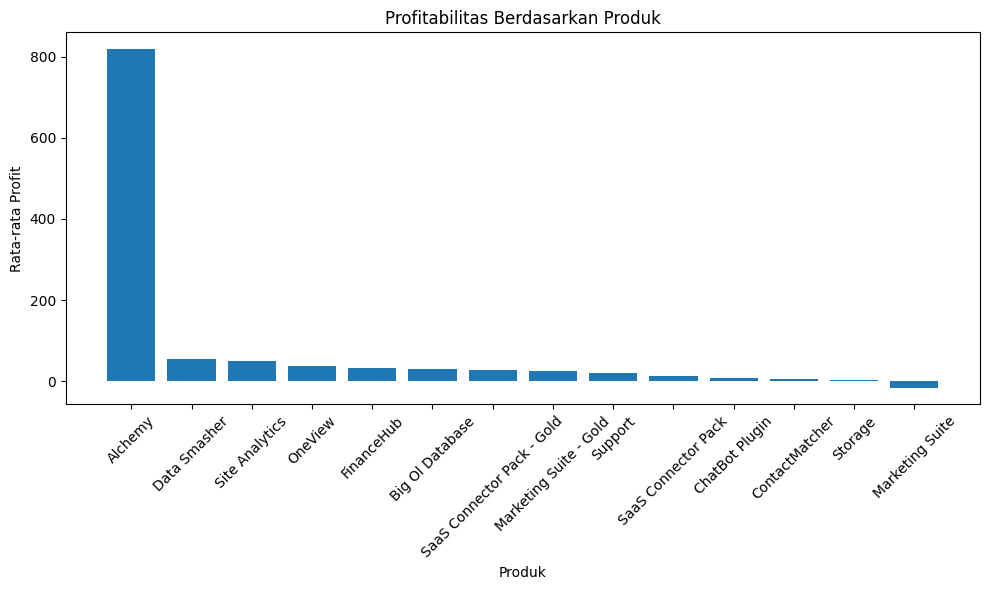

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(product_profit['Product'], product_profit['Profit'])
plt.xlabel('Produk')
plt.ylabel('Rata-rata Profit')
plt.title('Profitabilitas Berdasarkan Produk')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analisis Trend Penjualan**

In [26]:
# Ubah kolom 'Order Date' menjadi tipe datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [27]:
# Kelompokkan data berdasarkan bulan dan hitung total penjualan per bulan
monthly_sales = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum()

In [28]:
# Ubah indeks menjadi tanggal pertama setiap bulan
monthly_sales.index = monthly_sales.index.to_timestamp()

In [29]:
monthly_sales

Order Date
2020-01-01     13946.2290
2020-02-01      4810.5580
2020-03-01     55691.0090
2020-04-01     28295.3450
2020-05-01     23648.2870
2020-06-01     34595.1276
2020-07-01     33946.3930
2020-08-01     27909.4685
2020-09-01     81777.3508
2020-10-01     31453.3930
2020-11-01     78628.7167
2020-12-01     69545.6205
2021-01-01     18174.0756
2021-02-01     11951.4110
2021-03-01     38726.2520
2021-04-01     34195.2085
2021-05-01     30131.6865
2021-06-01     24797.2920
2021-07-01     28765.3250
2021-08-01     36898.3322
2021-09-01     64595.9180
2021-10-01     31404.9235
2021-11-01     75972.5635
2021-12-01     74919.5212
2022-01-01     18542.4910
2022-02-01     22867.7110
2022-03-01     51186.2170
2022-04-01     39248.5930
2022-05-01     56691.0770
2022-06-01     39430.4430
2022-07-01     38440.7550
2022-08-01     33265.5643
2022-09-01     72908.1089
2022-10-01     56463.1300
2022-11-01     82192.3228
2022-12-01     97237.4170
2023-01-01     44703.1420
2023-02-01     20283.5134
2

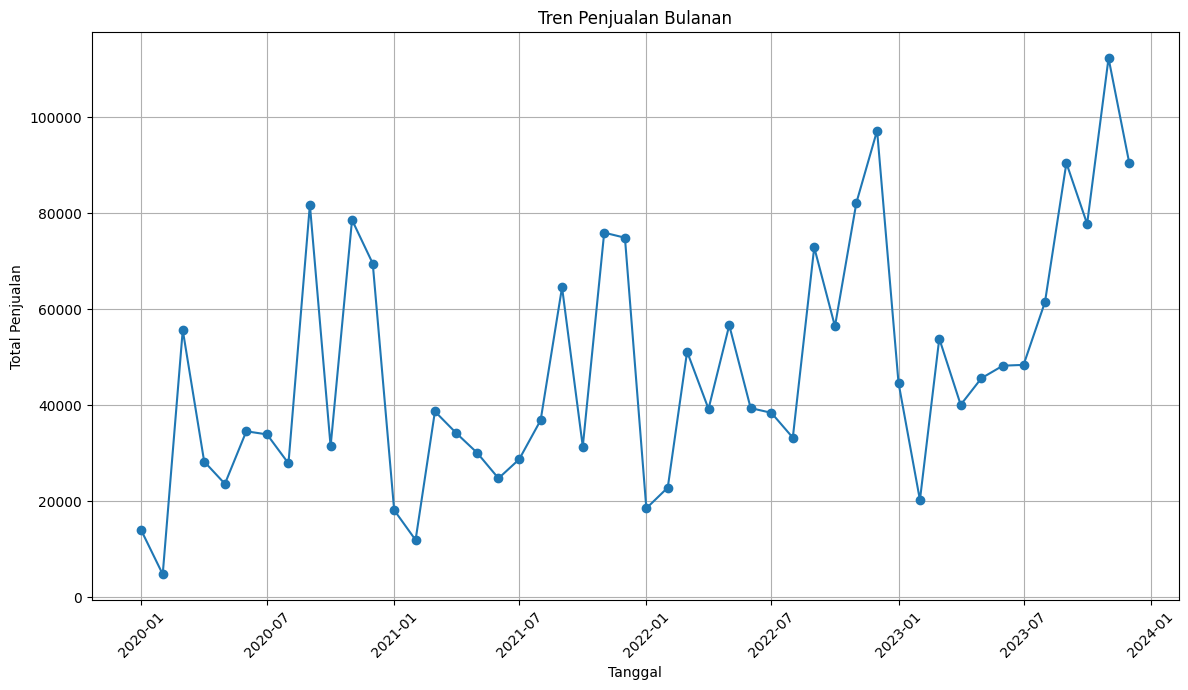

In [30]:
plt.figure(figsize=(12, 7))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.title('Tren Penjualan Bulanan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Analisis Country, Region, dan Subregion**

In [31]:
regionsubregion = df.groupby(['Country','Region', 'Subregion'])[['Sales', 'Profit', 'Quantity']].sum().reset_index()
regionsubregion

,Country,Region,Subregion,Sales,Profit,Quantity
0,Argentina,AMER,LATAM,35764.3120,9772.9138,454
1,Australia,APJ,ANZ,80166.1010,-12607.8870,1845
2,Austria,EMEA,EU-WEST,2865.0200,1059.5893,40
3,Belgium,EMEA,EU-WEST,17431.1500,-1190.4705,499
4,Brazil,AMER,LATAM,76269.6140,24463.1876,946
5,Canada,AMER,NAMER,138641.2700,33402.6517,1883
6,Chile,AMER,LATAM,35282.0010,-3427.9246,862
7,China,APJ,APAC,23705.5230,7031.1788,420
8,Colombia,AMER,LATAM,8481.7100,1769.0566,172
9,Costa Rica,AMER,LATAM,7464.9300,2037.0942,136


*grafik penjualan per country*

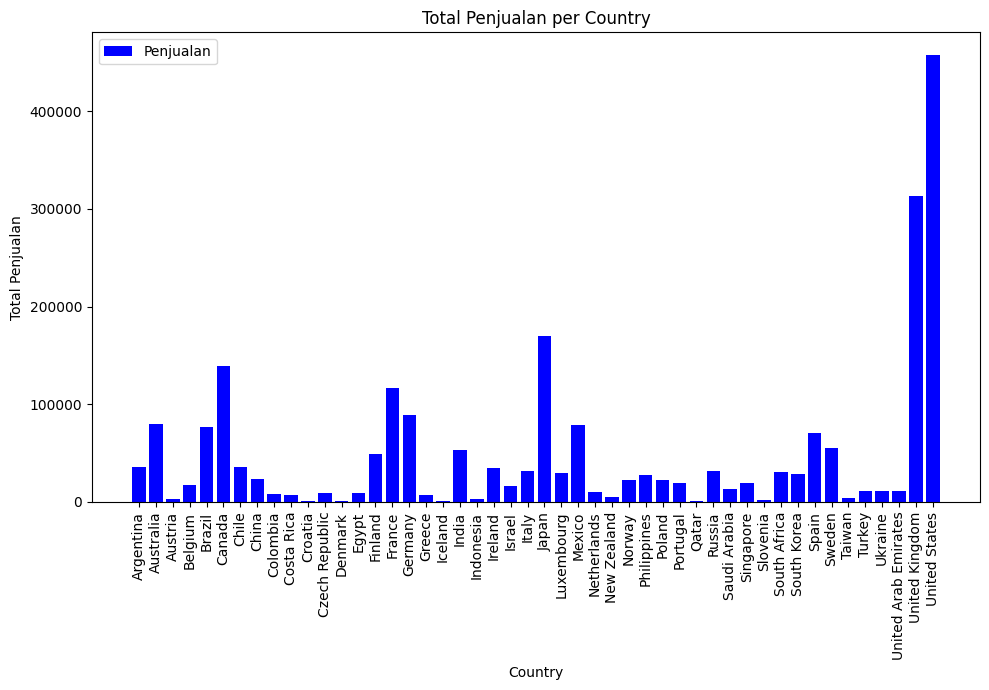

In [32]:
plt.figure(figsize=(10, 7))
plt.bar(regionsubregion['Country'], regionsubregion['Sales'], label='Penjualan', color='blue')
plt.xlabel('Country')
plt.ylabel('Total Penjualan')
plt.title('Total Penjualan per Country')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

*Profit penjualan per country*

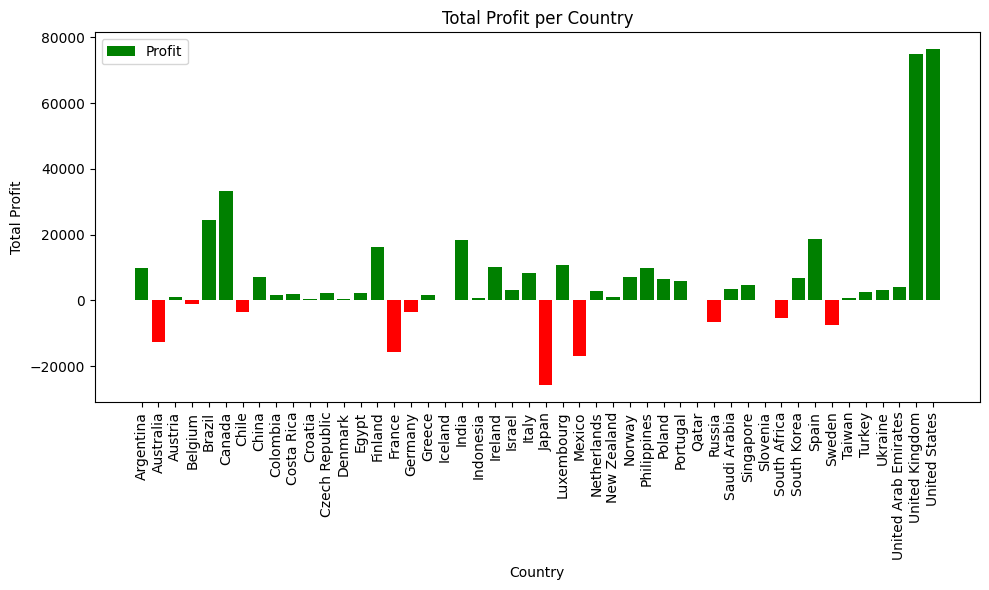

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(regionsubregion['Country'], regionsubregion['Profit'], label='Profit', color='green')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.title('Total Profit per Country')
plt.xticks(rotation=90)

# Menyoroti profit negatif dengan warna merah
for i, profit in enumerate(regionsubregion['Profit']):
    if profit < 0:
        plt.bar(regionsubregion['Country'][i], profit, color='red')

plt.legend()
plt.tight_layout()
plt.show()

*grafik penjualan per region*

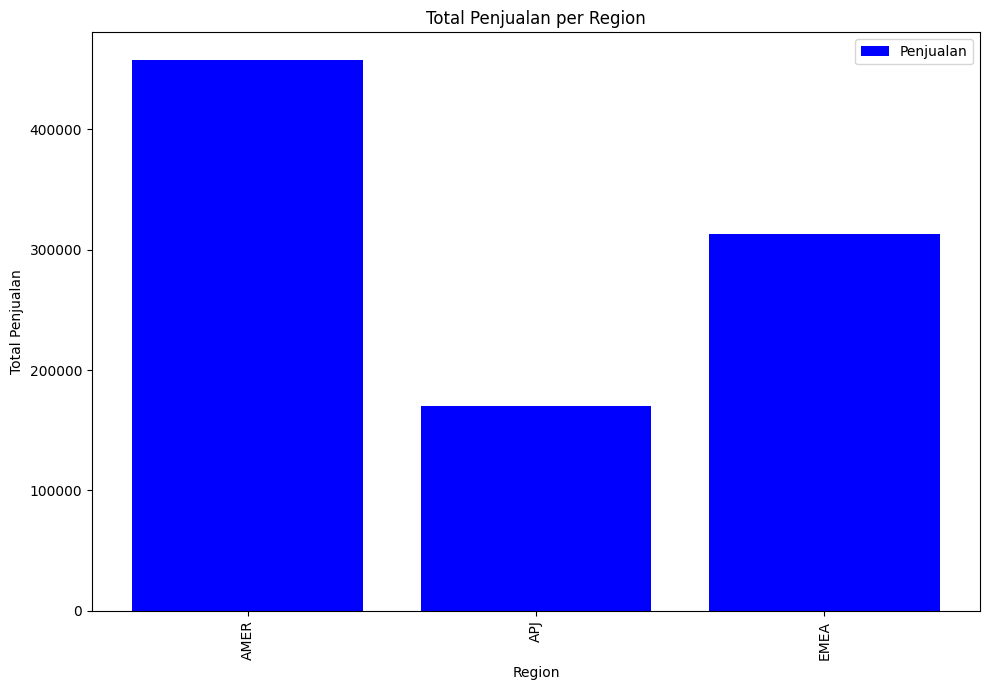

In [34]:
plt.figure(figsize=(10, 7))
plt.bar(regionsubregion['Region'], regionsubregion['Sales'], label='Penjualan', color='blue')
plt.xlabel('Region')
plt.ylabel('Total Penjualan')
plt.title('Total Penjualan per Region')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

*profit penjualan per region*

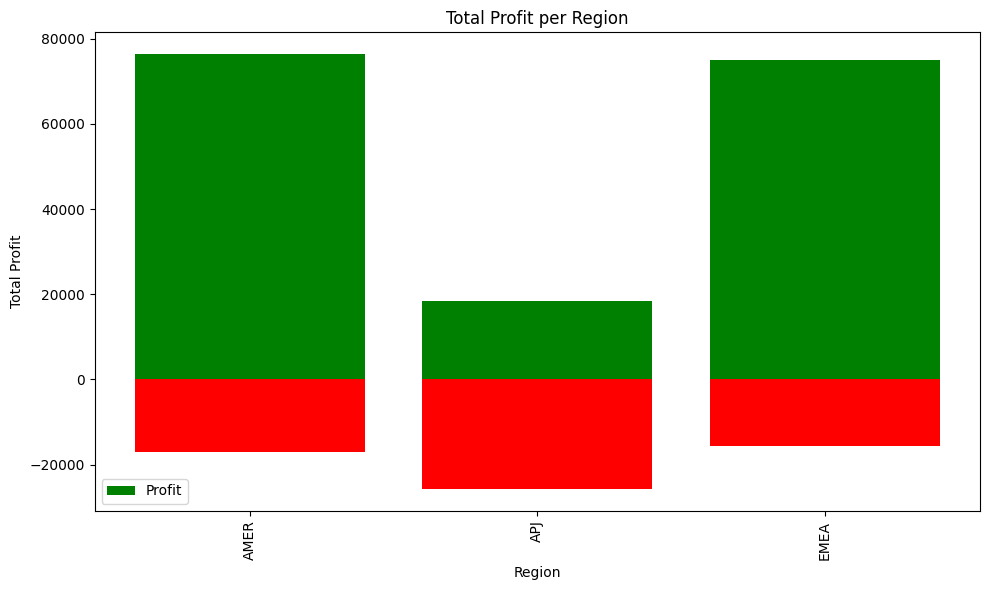

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(regionsubregion['Region'], regionsubregion['Profit'], label='Profit', color='green')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Total Profit per Region')
plt.xticks(rotation=90)

# Menyoroti profit negatif dengan warna merah
for i, profit in enumerate(regionsubregion['Profit']):
    if profit < 0:
        plt.bar(regionsubregion['Region'][i], profit, color='red')

plt.legend()
plt.tight_layout()
plt.show()

*grafik penjualan per subregion*

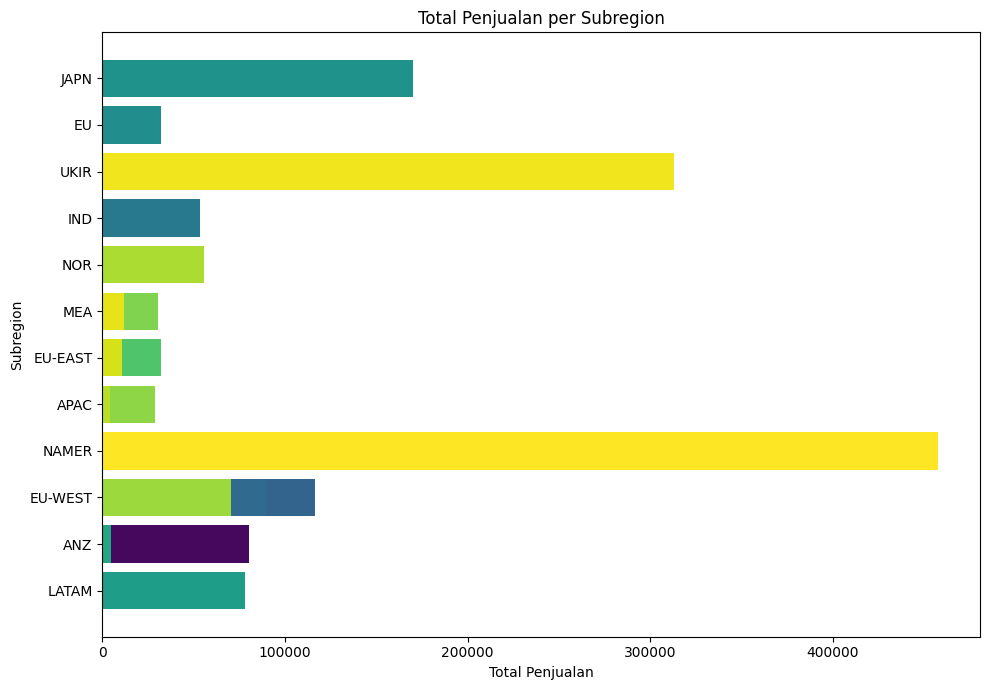

In [36]:
colors = plt.cm.viridis(np.linspace(0, 1, len(regionsubregion)))
plt.figure(figsize=(10, 7))
plt.barh(regionsubregion['Subregion'], regionsubregion['Sales'], color=colors)
plt.xlabel('Total Penjualan')
plt.ylabel('Subregion')
plt.title('Total Penjualan per Subregion')
plt.tight_layout()
plt.show()

*profit penjualan per subregion*

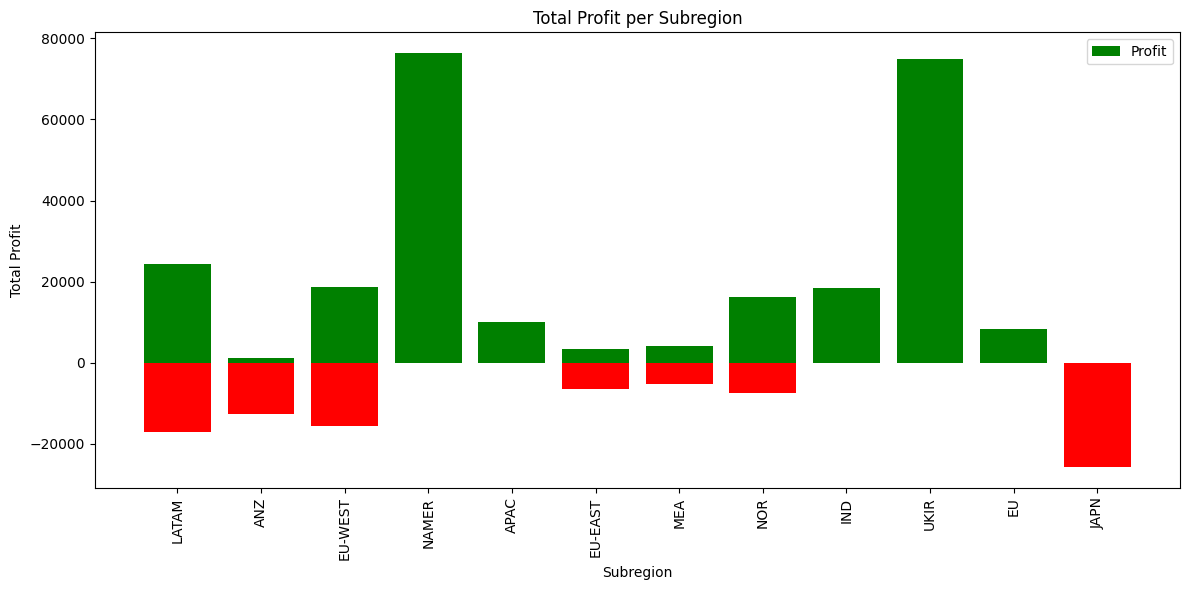

In [37]:
plt.figure(figsize=(12, 6))
plt.bar(regionsubregion['Subregion'], regionsubregion['Profit'], label='Profit', color='green')
plt.xlabel('Subregion')
plt.ylabel('Total Profit')
plt.title('Total Profit per Subregion')
plt.xticks(rotation=90)

# Menyoroti profit negatif dengan warna merah
for i, profit in enumerate(regionsubregion['Profit']):
    if profit < 0:
        plt.bar(regionsubregion['Subregion'][i], profit, color='red')

plt.legend()
plt.tight_layout()
plt.show()

**Analisis produk terlaris**

In [38]:
# Kelompokkan data berdasarkan produk dan menghitung total penjualan dan profit per produk
product_stats = df.groupby('Product')[['Sales', 'Profit']].sum().reset_index()

*Urutkan produk berdasarkan total penjualan*

In [39]:
topselling = product_stats.sort_values(by='Sales', ascending=False)
topselling

,Product,Sales,Profit
3,ContactMatcher,410378.2650,12496.2822
5,FinanceHub,340935.4150,32136.4203
11,Site Analytics,330007.0540,44515.7306
7,Marketing Suite - Gold,223843.6080,21278.8264
1,Big Ol Database,189238.6310,3384.7569
4,Data Smasher,167380.3180,41936.6357
0,Alchemy,149528.0300,55617.8249
13,Support,125152.7440,32864.4698
6,Marketing Suite,114879.9963,-3472.5560
8,OneView,107532.1610,18138.0054


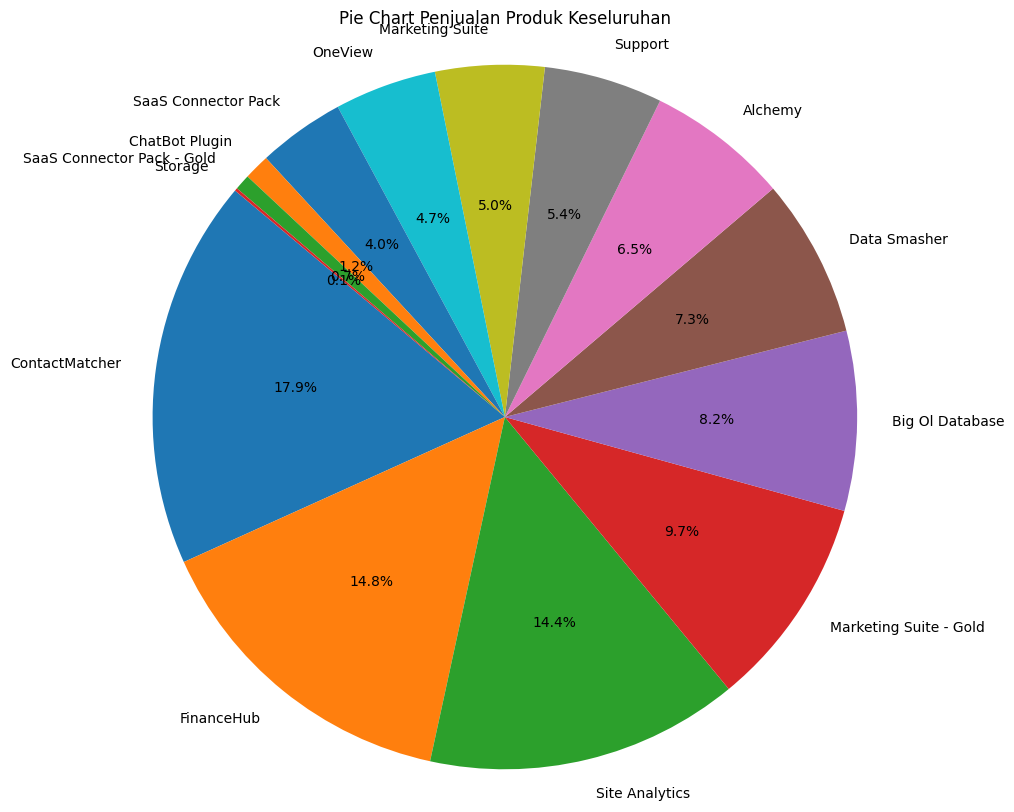

In [40]:
labels = topselling['Product']
sizes = topselling['Sales']

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Pie Chart Penjualan Produk Keseluruhan')
plt.show()

*Urutkan produk berdasarkan total profit*

In [41]:
profitable = product_stats.sort_values(by='Profit', ascending=False)
profitable

,Product,Sales,Profit
0,Alchemy,149528.0300,55617.8249
11,Site Analytics,330007.0540,44515.7306
4,Data Smasher,167380.3180,41936.6357
13,Support,125152.7440,32864.4698
5,FinanceHub,340935.4150,32136.4203
7,Marketing Suite - Gold,223843.6080,21278.8264
8,OneView,107532.1610,18138.0054
9,SaaS Connector Pack,91705.1640,13059.1436
3,ContactMatcher,410378.2650,12496.2822
10,SaaS Connector Pack - Gold,16476.4020,6964.1767


In [42]:
# Mengambil hanya produk dengan profit positif
profitable = profitable[profitable['Profit'] > 0]

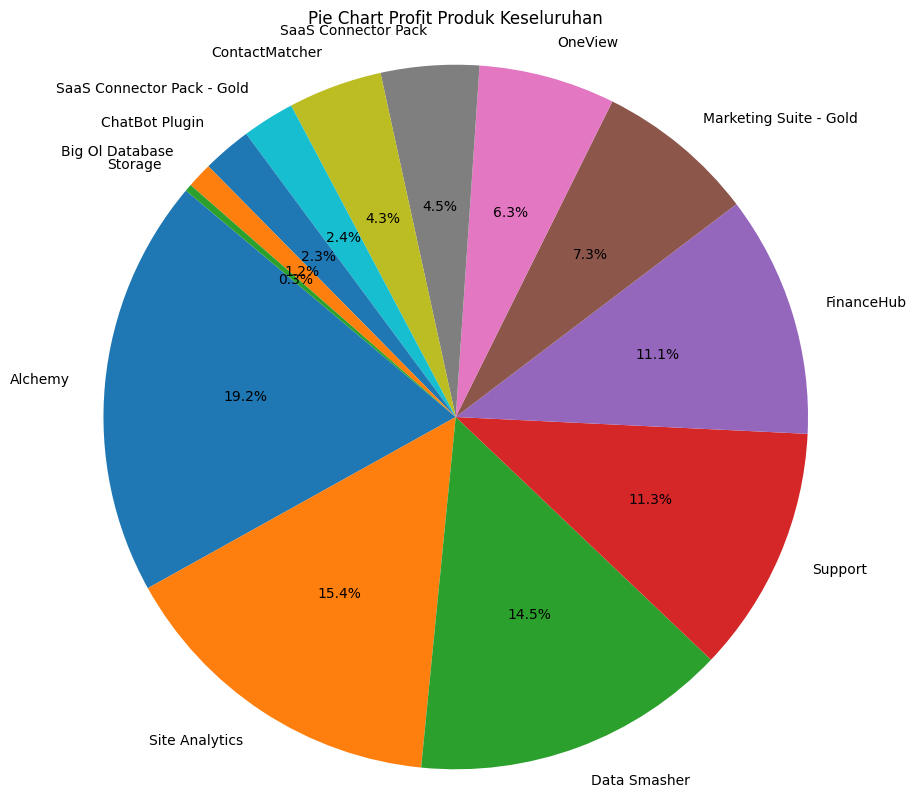

In [43]:
labels = profitable['Product']
sizes = profitable['Profit']

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Pie Chart Profit Produk Keseluruhan')
plt.show()

**Analisis Diskon**

In [44]:
# Kelompokkan data berdasarkan tingkat diskon dan Hitung total penjualan dan profit per tingkat diskon
discount_stats = df.groupby('Discount')[['Sales', 'Profit']].sum().reset_index()
discount_stats

,Discount,Sales,Profit
0,0.00,1.087908e+06,320987.6032
1,0.10,5.436935e+04,9029.1770
2,0.15,2.755852e+04,1418.9915
3,0.20,7.645944e+05,90337.3060
4,0.30,1.032267e+05,-10369.2774
5,0.32,1.449346e+04,-2391.1377
6,0.40,1.164178e+05,-23057.0504
7,0.45,5.484974e+03,-2493.1111
8,0.50,5.891854e+04,-20506.4281
9,0.60,6.644700e+03,-5944.6552


*Grafik pengaruh diskon terhadap penjualan*


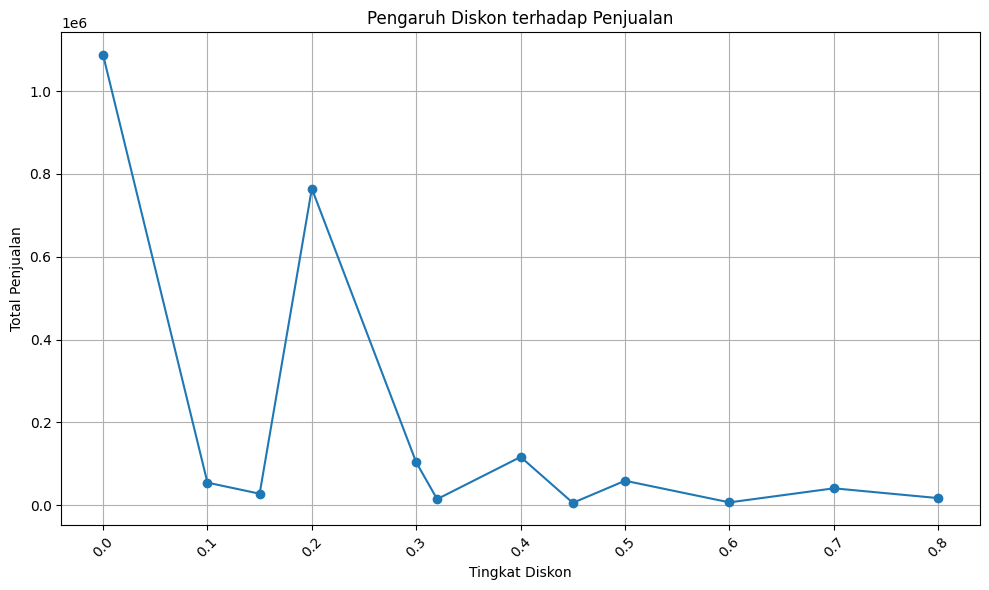

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(discount_stats['Discount'], discount_stats['Sales'], marker='o', linestyle='-')
plt.xlabel('Tingkat Diskon')
plt.ylabel('Total Penjualan')
plt.title('Pengaruh Diskon terhadap Penjualan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

*Grafik pengaruh diskon terhadap profit*

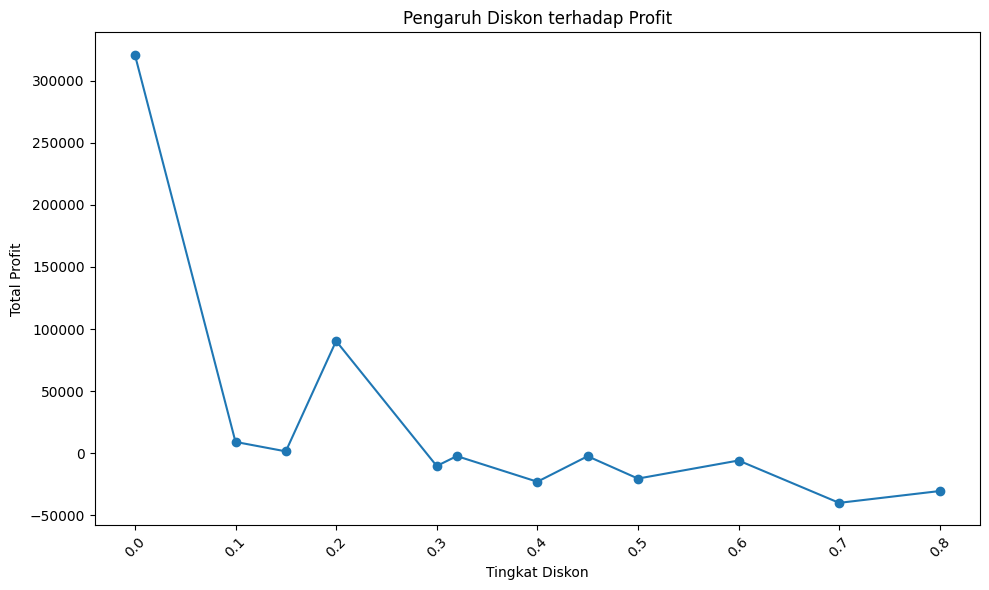

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(discount_stats['Discount'], discount_stats['Profit'], marker='o', linestyle='-')
plt.xlabel('Tingkat Diskon')
plt.ylabel('Total Profit')
plt.title('Pengaruh Diskon terhadap Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analisis Profit Untuk Setiap Produk**

In [47]:
# Mengelompokkan data berdasarkan produk (Product) dan menghitung total penjualan dan profit per produk
product_stats = df.groupby('Product')[['Sales', 'Profit']].sum().reset_index()

# Hitung margin profit untuk setiap produk
product_stats['Profit Margin'] = (product_stats['Profit'] / product_stats['Sales']) * 100

# Urutkan tiap produk berdasarkan profit
profitable_products = product_stats.sort_values(by='Profit Margin', ascending=False)
profitable_products

,Product,Sales,Profit,Profit Margin
10,SaaS Connector Pack - Gold,16476.4020,6964.1767,42.267582
0,Alchemy,149528.0300,55617.8249,37.195585
12,Storage,3024.2800,949.5182,31.396504
13,Support,125152.7440,32864.4698,26.259488
4,Data Smasher,167380.3180,41936.6357,25.054700
2,ChatBot Plugin,27118.7920,6527.7870,24.071083
8,OneView,107532.1610,18138.0054,16.867517
9,SaaS Connector Pack,91705.1640,13059.1436,14.240358
11,Site Analytics,330007.0540,44515.7306,13.489327
7,Marketing Suite - Gold,223843.6080,21278.8264,9.506113


**analisis korelasi antara berbagai variabel**

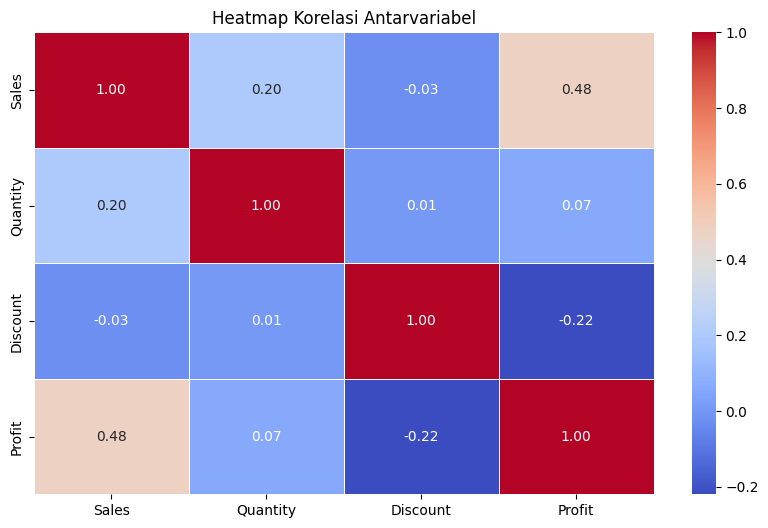

In [48]:
# Memilih variabel yang akan dianalisis
selected_variables = ['Sales', 'Quantity', 'Discount', 'Profit']

# Membuat DataFrame dengan variabel yang dipilih
selected_data = df[selected_variables]

# Menghitung korelasi antarvariabel
correlation_matrix = selected_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antarvariabel')
plt.show()

Perbandingan Kinerja Tahunan:
   Year        Sales
0  2020  484247.4981
1  2021  470532.5090
2  2022  608473.8300
3  2023  733947.0232


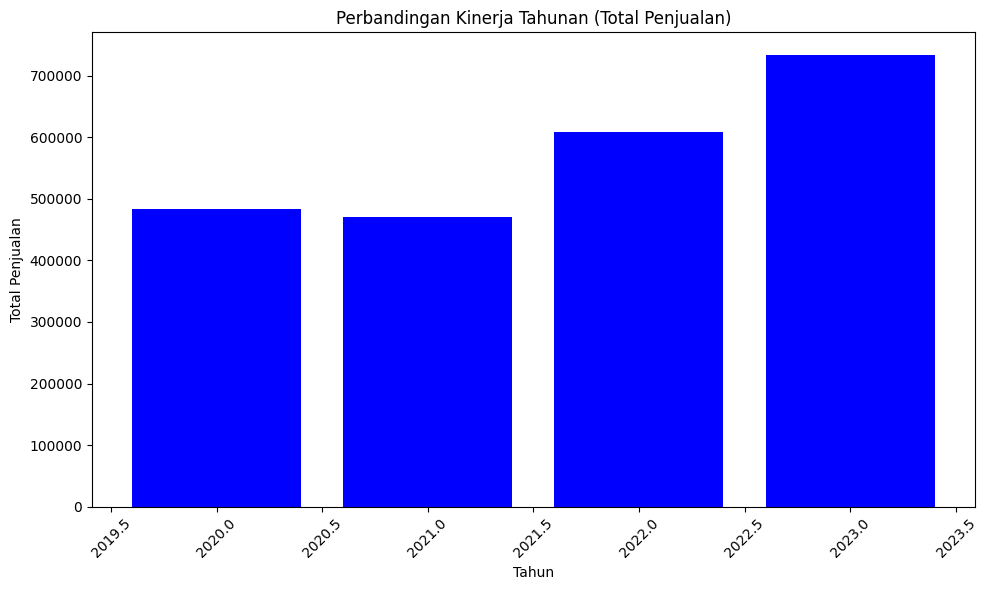

In [49]:
# Mengubah kolom tanggal (Order Date) menjadi tipe datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Mengambil tahun dari kolom tanggal
df['Year'] = df['Order Date'].dt.year

# Mengelompokkan data berdasarkan tahun dan menghitung total penjualan per tahun
annual_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Analisis perbandingan kinerja tahunan
print("Perbandingan Kinerja Tahunan:")
print(annual_sales)

# Visualisasi data perbandingan kinerja tahunan
plt.figure(figsize=(10, 6))
plt.bar(annual_sales['Year'], annual_sales['Sales'], color='blue')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')
plt.title('Perbandingan Kinerja Tahunan (Total Penjualan)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Barang yang sering dibeli oleh tiap customer**

In [50]:
customer_product_counts = df.groupby(['Customer', 'Product']).size().reset_index(name='Count')
customer = customer_product_counts.groupby('Customer')['Product'].agg(pd.Series.mode).reset_index(name='Produk')
customer

,Customer,Produk
0,AT&T,"[Big Ol Database, ChatBot Plugin, ContactMatch..."
1,Abbott Laboratories,"[ChatBot Plugin, ContactMatcher, Data Smasher,..."
2,Aetna,"[Alchemy, Big Ol Database, ChatBot Plugin, Con..."
3,Airbus,"[Alchemy, ChatBot Plugin, ContactMatcher, Data..."
4,Allianz,"[Alchemy, ChatBot Plugin, ContactMatcher, Data..."
...,...,...
94,Volkswagen,"[Big Ol Database, ChatBot Plugin, ContactMatch..."
95,Walgreens,"[Big Ol Database, ChatBot Plugin, ContactMatch..."
96,Walmart,"[Big Ol Database, ChatBot Plugin, ContactMatch..."
97,Walt Disney,"[Big Ol Database, ChatBot Plugin, ContactMatch..."


# **Rekomendasi**

**Rekomendasi produk berdasarkan tingkat penjualan**

In [51]:
df=pd.read_csv('SaaS-Sales.csv')

# Menghitung total penjualan untuk setiap produk
product_sales = df.groupby('Product')['Sales'].sum().reset_index()

# Mengurutkan produk berdasarkan total penjualan dalam urutan menurun
product_sales_sorted = product_sales.sort_values(by='Sales', ascending=False)

# Menampilkan rekomendasi produk berdasarkan tingkat penjualan
rekomendasi_produk = product_sales_sorted[['Product', 'Sales']]
rekomendasi_produk.head(10)

,Product,Sales
3,ContactMatcher,410378.2650
5,FinanceHub,340935.4150
11,Site Analytics,330007.0540
7,Marketing Suite - Gold,223843.6080
1,Big Ol Database,189238.6310
4,Data Smasher,167380.3180
0,Alchemy,149528.0300
13,Support,125152.7440
6,Marketing Suite,114879.9963
8,OneView,107532.1610


**Rekomendasi produk berdasarkan tingkat profit**

In [52]:
df = pd.read_csv('SaaS-Sales.csv')

# Menghitung total profit untuk setiap produk
product_profit = df.groupby('Product')['Profit'].sum().reset_index()

product_profit_sorted = product_profit.sort_values(by='Profit', ascending=False)
rekomendasi_produk_profit = product_profit_sorted[['Product', 'Profit']]
top_10_rekomendasi_produk_profit = rekomendasi_produk_profit.head(10)
top_10_rekomendasi_produk_profit

,Product,Profit
0,Alchemy,55617.8249
11,Site Analytics,44515.7306
4,Data Smasher,41936.6357
13,Support,32864.4698
5,FinanceHub,32136.4203
7,Marketing Suite - Gold,21278.8264
8,OneView,18138.0054
9,SaaS Connector Pack,13059.1436
3,ContactMatcher,12496.2822
10,SaaS Connector Pack - Gold,6964.1767


**1 Rekomendasi Produk Berdasarkan Tingkat Penjualan Per Negara**

In [53]:
# Membaca data dari file CSV
df = pd.read_csv('SaaS-Sales.csv')

# Menghitung total penjualan untuk setiap produk per negara
product_sales_by_country = df.groupby(['Country', 'Product'])['Sales'].sum().reset_index()

# Mengurutkan produk berdasarkan total penjualan dalam setiap negara dalam urutan menurun
product_sales_by_country_sorted = product_sales_by_country.groupby('Country').apply(lambda x: x.sort_values(by='Sales', ascending=False)).reset_index(drop=True)

# Menampilkan rekomendasi produk berdasarkan tingkat penjualan per negara
top_1_rekomendasi_produk_per_country = product_sales_by_country_sorted.groupby('Country').head(1)
top_1_rekomendasi_produk_per_country

,Country,Product,Sales
0,Argentina,Big Ol Database,9899.850
13,Australia,Site Analytics,16771.784
27,Austria,Big Ol Database,1379.920
33,Belgium,FinanceHub,4743.272
46,Brazil,ContactMatcher,28538.550
60,Canada,ContactMatcher,43218.448
74,Chile,Site Analytics,7388.776
87,China,FinanceHub,4501.420
100,Colombia,Marketing Suite - Gold,2567.210
110,Costa Rica,Site Analytics,3045.800


**5 Rekomendasi Produk Berdasarkan Tingkat Penjualan Per Sub Wilayah**

In [54]:
df = pd.read_csv('SaaS-Sales.csv')

# Menghitung total penjualan untuk setiap produk per Subregion
product_sales_by_subregion = df.groupby(['Subregion', 'Product'])['Sales'].sum().reset_index()

product_sales_by_subregion_sorted = product_sales_by_subregion.groupby('Subregion').apply(lambda x: x.sort_values(by='Sales', ascending=False)).reset_index(drop=True)
top_5_rekomendasi_produk_per_subregion = product_sales_by_subregion_sorted.groupby('Subregion').head(5)
top_5_rekomendasi_produk_per_subregion

,Subregion,Product,Sales
0,ANZ,Site Analytics,17305.912
1,ANZ,FinanceHub,15920.692
2,ANZ,ContactMatcher,11214.848
3,ANZ,Marketing Suite - Gold,9359.988
4,ANZ,Data Smasher,6699.496
14,APAC,ContactMatcher,18518.022
15,APAC,Site Analytics,15696.788
16,APAC,Marketing Suite - Gold,15226.050
17,APAC,FinanceHub,14931.592
18,APAC,Alchemy,11699.950


**3 Rekomendasi Produk Berdasarkan Tingkat Penjualan Per Wilayah**

In [55]:
df = pd.read_csv('SaaS-Sales.csv')

# Menghitung total penjualan untuk setiap produk per wilayah
product_sales_by_region = df.groupby(['Region', 'Product'])['Sales'].sum().reset_index()
product_sales_by_region_sorted = product_sales_by_region.groupby('Region').apply(lambda x: x.sort_values(by='Sales', ascending=False)).reset_index(drop=True)
top_3_rekomendasi_produk_per_region = product_sales_by_region_sorted.groupby('Region').head(3)
top_3_rekomendasi_produk_per_region

,Region,Product,Sales
0,AMER,ContactMatcher,166236.424
1,AMER,FinanceHub,120956.496
2,AMER,Site Analytics,113897.388
14,APJ,Site Analytics,67052.658
15,APJ,FinanceHub,64747.932
16,APJ,ContactMatcher,62066.927
28,EMEA,ContactMatcher,182074.914
29,EMEA,FinanceHub,155230.987
30,EMEA,Site Analytics,149057.008


**1 Rekomendasi Produk Berdasarkan Tingkat Profit Per Negara**

In [56]:
df = pd.read_csv('SaaS-Sales.csv')

# Menghitung total profit untuk setiap produk per negara
product_profit_by_country = df.groupby(['Country', 'Product'])['Profit'].sum().reset_index()
product_profit_by_country_sorted = product_profit_by_country.groupby('Country').apply(lambda x: x.sort_values(by='Profit', ascending=False)).reset_index(drop=True)
top_1_rekomendasi_produk_profit_per_country = product_profit_by_country_sorted.groupby('Country').head(1)
top_1_rekomendasi_produk_profit_per_country

,Country,Product,Profit
0,Argentina,Big Ol Database,2709.9522
13,Australia,Alchemy,1831.9666
27,Austria,Big Ol Database,648.5624
33,Belgium,FinanceHub,426.4428
46,Brazil,ContactMatcher,12167.3825
60,Canada,ContactMatcher,10937.8014
74,Chile,Site Analytics,818.6728
87,China,ContactMatcher,1524.3938
100,Colombia,FinanceHub,543.0760
110,Costa Rica,Site Analytics,891.6315


**5 Rekomendasi Produk Berdasarkan Profit Per Sub Wilayah**

In [57]:
df = pd.read_csv('SaaS-Sales.csv')

# Menghitung total profit untuk setiap produk per Subregion
product_profit_by_subregion = df.groupby(['Subregion', 'Product'])['Profit'].sum().reset_index()
product_profit_by_subregion_sorted = product_profit_by_subregion.groupby('Subregion').apply(lambda x: x.sort_values(by='Profit', ascending=False)).reset_index(drop=True)
top_5_rekomendasi_produk_profit_per_subregion = product_profit_by_subregion_sorted.groupby('Subregion').head(5)
top_5_rekomendasi_produk_profit_per_subregion

,Subregion,Product,Profit
0,ANZ,Alchemy,1831.9666
1,ANZ,Site Analytics,1755.6342
2,ANZ,Support,1500.7665
3,ANZ,Data Smasher,1246.2017
4,ANZ,Big Ol Database,326.0395
14,APAC,Alchemy,5507.9778
15,APAC,ContactMatcher,4566.9955
16,APAC,Site Analytics,4094.9267
17,APAC,FinanceHub,3618.7668
18,APAC,Marketing Suite - Gold,3105.7326


**3 Rekomendasi Produk Berdasarkan Profit Per Wilayah**

In [58]:
df = pd.read_csv('SaaS-Sales.csv')

# Menghitung total profit untuk setiap produk per region
product_profit_by_region = df.groupby(['Region', 'Product'])['Profit'].sum().reset_index()
product_profit_by_region_sorted = product_profit_by_region.groupby('Region').apply(lambda x: x.sort_values(by='Profit', ascending=False)).reset_index(drop=True)
top_3_rekomendasi_produk_profit_per_region = product_profit_by_region_sorted.groupby('Region').head(3)
top_3_rekomendasi_produk_profit_per_region

,Region,Product,Profit
0,AMER,ContactMatcher,26663.9591
1,AMER,Data Smasher,19152.0253
2,AMER,Alchemy,18264.2564
14,APJ,Alchemy,17819.8729
15,APJ,Site Analytics,10631.0486
16,APJ,Support,5871.1384
28,EMEA,Site Analytics,24612.0425
29,EMEA,FinanceHub,21229.0296
30,EMEA,Alchemy,19533.6956
